In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Data exploration and visualization

In [5]:
df.shape

(14999, 10)

### Checking for any missing values


In [12]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [13]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [9]:
## check how many have to left
df[df.left==1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
df[df.left==0] ## how many not left company

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [18]:
### find left percentage and avareage
df.groupby(df['left']).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [19]:
## as above table 
# left satisfaction_level is .44 
# averager mountly hours of person who left(1) company is more than other(left==0)
# promotion rate is also low for left(1) person

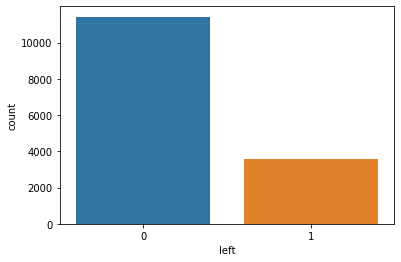

In [21]:
sns.countplot(df['left'])

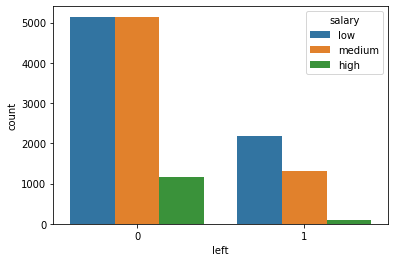

In [25]:
sns.countplot(df['left'],hue=df['salary'])

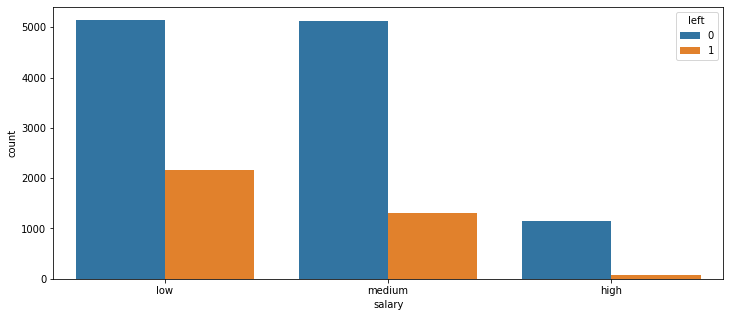

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(df['salary'],hue=df['left'])

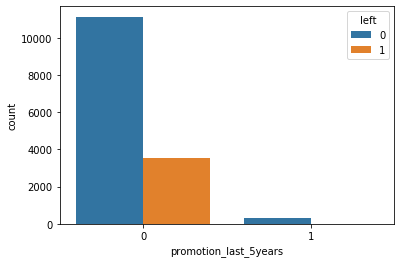

In [30]:
sns.countplot(df['promotion_last_5years'],hue=df['left'])

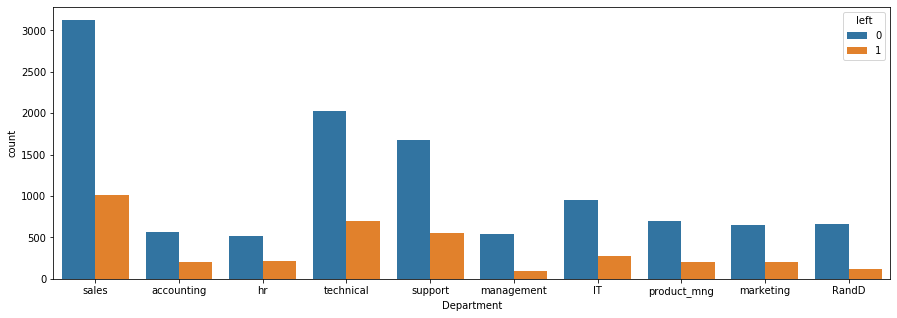

In [35]:
## deparment wise left 
plt.figure(figsize=(15,5))
sns.countplot(df['Department'],hue=df['left'])

### which department employ left most

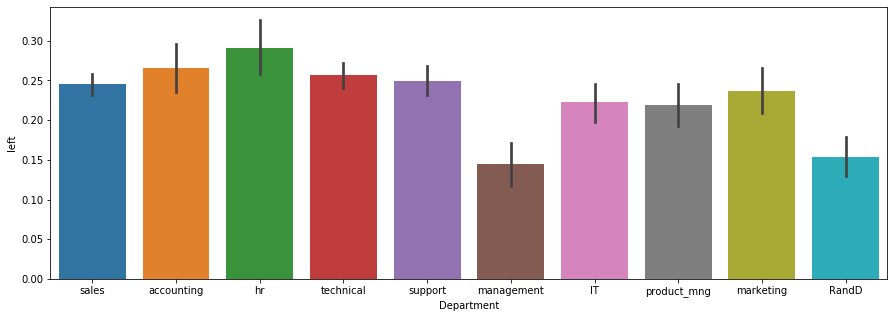

In [36]:
## which department employ left most
plt.figure(figsize=(15,5))
sns.barplot(x=df['Department'],y=df['left'])

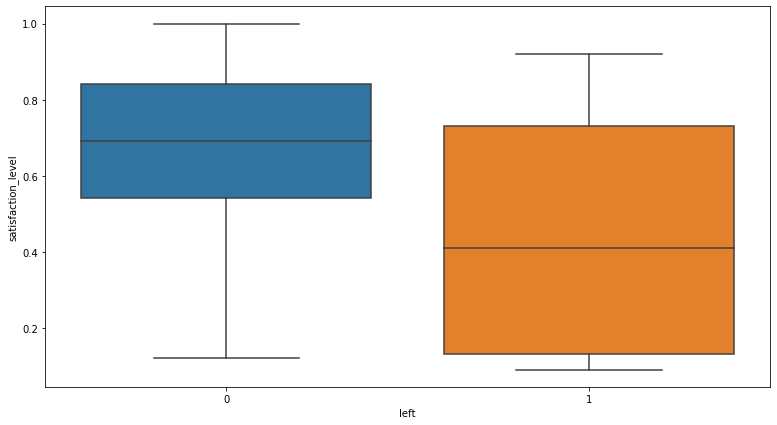

In [39]:
plt.figure(figsize=(13,7))
sns.boxplot(x=df['left'],y=df['satisfaction_level'])

<h3 style="color:red">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [40]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [41]:
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [47]:
# create dummy variable for 'salary' using one hot key
dummy = pd.get_dummies(subdf['salary'],prefix='salary') # prefix only use for add 'salary' as prefix in dummy colum name ex=salary_low
subdf_dummy = pd.concat([subdf,dummy],axis='columns')
# remove salary column
subdf_dummy.drop('salary',axis='columns',inplace=True)
subdf_dummy.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [48]:
x = subdf_dummy
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

In [60]:
## create training and test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,df['left'],train_size=0.7)

In [61]:
# model.fit(df['satisfaction_level','average_montly_hours','promotion_last_5years','salary_high','salary_low','salary_medium'])
model.fit(x_train,y_train)


C:\Users\kulde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
model.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Accuracy of model

In [63]:
model.score(x_test,y_test)

0.7826666666666666